<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [1]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,μₖs,λₖs = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x0 : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. epsilon     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. λ₀     : la deuxième composante du point de départ du Lagrangien
    5. μ₀, τ    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * μₖs : (Array{Float64,1}) tableau des valeurs prises par mu_k au cours de l'exécution
  * λₖs : (Array{Float64,1}) tableau des valeurs prises par lambda_k au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x0 = [1; 0]
options = []
xmin,fxmin,flag,iter,μₖs,λₖs = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x0,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [2]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = true

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

-------------------------------------------------------------------------


Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x01 :


  * xsol = 

[0.5000002259296457, 1.249999887035177, 0.5000002259296459]
  * f(xsol) = 

2.2499979666336474
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 

1.25, 0.5

]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000002259296457, 1.249999887035177, 0.5000002259296459]
  * f(xsol) = 2.2499979666336474
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072338874848903, 0.8227553232868374]
  * f(xsol) = 0.00861566424194443
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x04 :
  * xsol = [0.9072338874849172, 0.8227553232868865]
  * f(xsol) = 0.00861566424193943
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec gct appliqué à fonction 1 au point initial x01 :
  * xsol = [0.5000002159431961, 1.2499998856815404, 0.5000002167933204]
  * f(xsol) = 2.249998052686096
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec gct appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000002126613426, 1.2499998900565834, 0.5000002251747253]
  * f(xsol) = 2.2499980297381246
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5

]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec gct appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072338942008552, 0.8227553357637625]
  * f(xsol) = 0.008615662977407311
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec gct appliqué à fonction 2 au point initial x04 :
  * xsol = [0.9072338672788663, 0.8227552865697088]
  * f(xsol) = 0.008615667994244663
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec cauchy appliqué à fonction 1 au point initial x01 :
  * xsol = [0.5000002071447076, 1.2499998930661618, 0.5000002493970241]
  * f(xsol) = 2.2499979455626766
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]


-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec cauchy appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000002085104989, 1.2499998920469377, 0.5000002492256631]
  * f(xsol) = 2.2499979401877432
  * nb_iters = 9
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec cauchy appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072340228037679, 0.8227555695601168]
  * f(xsol) = 0.008615639088789302
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec cauchy appliqué à fonction 2 au point initial x04 :
  * xsol = [0.9072340228073725, 0.82275556956667]
  * f(xsol) = 0.008615639088119716
  * nb_iters = 6
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.82275

Test Summary:            | Pass  Total   Time
Test lagrangien augmente |   12     12  13.6s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.

In [3]:
using Pkg; Pkg.add("Plots")

    Updating registry at `C:\Users\bonet\.julia\registries\General`


    Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Resolving package versions...


  No Changes to `C:\Users\bonet\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\bonet\.julia\environments\v1.8\Manifest.toml`

In [4]:
# initialisation des paramètres
lambda0 = 2
mu0 = 10
tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4
	
# Les trois algorithmes d'optimisations sans contraintes utlisés
algo = "newton"

xmin,fxmin,flag,nbiters,muks,lambdaks = Lagrangien_Augmente(algo,fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x03,options)
afficher_resultats("Lagrangien augmenté avec "*algo,"fonction 2","x03",xmin,fxmin,flag,sol_fct2_augm,nbiters)
println(muks)
println(lambdaks)



-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072338874848903, 0.8227553232868374]
  * f(xsol) = 0.00861566424194443
  * nb_iters = 6
  * flag = 

0
  * sol_exacte : [0.9072339605110892, 0.82275545631455]


[10.0, 20.0, 40.0, 40.0, 40.0, 40.0, 40.0]
[2.0, 2.0, 2.0, 0.044107067804553424, 0.038665453796571825, 0.03865139770756798, 0.038650949985814975]


## Réponse Q1

Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.

On remarque que les résultats obtenus sont très proches de la solution exacte. On remarque également que le nombre d'itérations décroît quand $\mu_{0}$ augmente. Que de façon générale les $\mu_k$ augmente au fur et à mesure des itérations. L'influence de $\lambda_{0}$ sur le nombre d'itérations est très faible et les $\lambda_k$ varient beaucoup suivant la fonction et le point de départ.

## Réponse Q2 

Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

On remarque que dans l'algorithme du Lagrangien augmenté, $\mu_{k}$ est mis à jour grâce à $\tau$ et est même proportionnel à celui-ci. Or, on a dit au-dessus que quand $\mu_{k}$ augmente, le nombre d'itérations décroît. On s'attend donc à ce que l'algorithme soit plus performant quand $\tau$ augmente. On remarque également que $\tau$ est inversement proportionnel aux valeurs qui gèrent les critères d'arrêt et de mise à jour des valeurs. Il serait donc logique que la précision s'améliore avec l'augmentation de $\tau$.

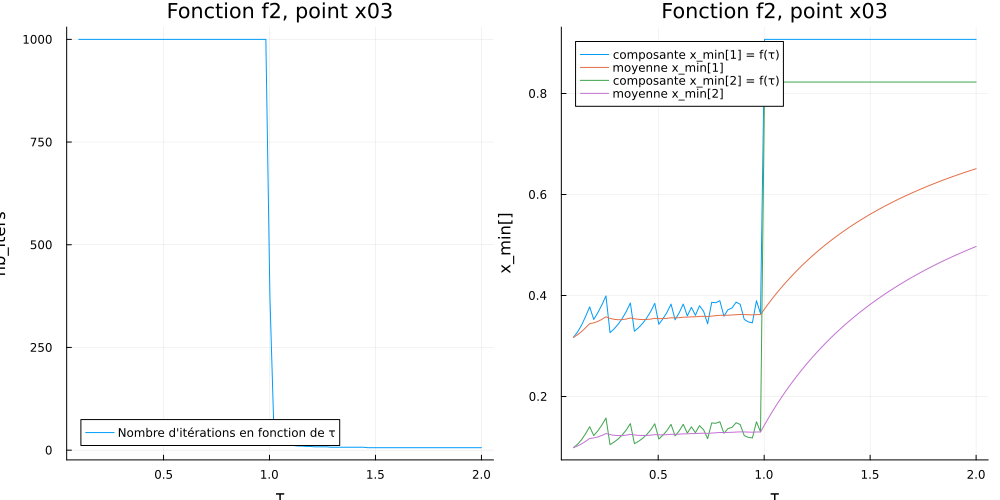

In [5]:
using Plots
# initialisation des paramètres
lambda0 = 2
mu0 = 10
#tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4
	
# Les trois algorithmes d'optimisations sans contraintes utlisés
algo = "newton"

iters = []
thos = []
x_mins1 = []
x_mins2 = []

for tho in range(0.1,2,length=100)
    options = [epsilon, tol, max_iters, lambda0, mu0, tho]
    xmin, _, _, nbiters = Lagrangien_Augmente(algo,fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x03,options)
    iters = [iters ; nbiters]
    thos = [thos ; tho]
    x_mins1 = [x_mins1 ; xmin[1]]
    x_mins2 = [x_mins2 ; xmin[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end
    
moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(thos,iters, label="Nombre d'itérations en fonction de τ", xlabel="τ", ylabel="nb_iters", title="Fonction f2, point x03", legend=:bottomleft)
p2 = plot(thos,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(τ)" "moyenne x_min[1]" "composante x_min[2] = f(τ)" "moyenne x_min[2]"], xlabel="τ", ylabel="x_min[]", title="Fonction f2, point x03", legend=:topleft)
plot(p1,p2,layout=(1,2),size=(1000,500))  

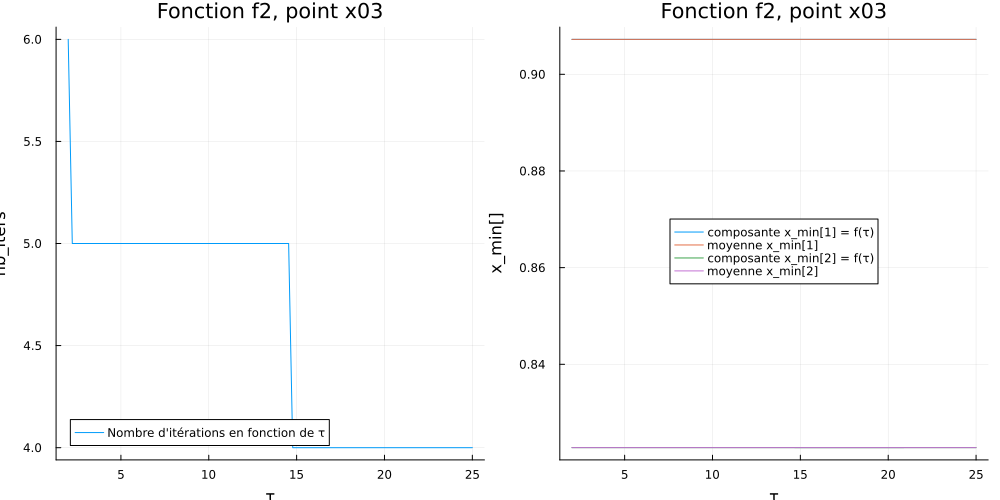

In [6]:
using Plots
# initialisation des paramètres
lambda0 = 2
mu0 = 10
#tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4
	
# Les trois algorithmes d'optimisations sans contraintes utlisés
algo = "newton"

iters = []
thos = []
x_mins1 = []
x_mins2 = []

for tho in range(2,25,length=100)
    options = [epsilon, tol, max_iters, lambda0, mu0, tho]
    xmin, _, _, nbiters = Lagrangien_Augmente(algo,fct2,contrainte2,grad_fct2,hess_fct2,grad_contrainte2,hess_contrainte2,pts2.x03,options)
    iters = [iters ; nbiters]
    thos = [thos ; tho]
    x_mins1 = [x_mins1 ; xmin[1]]
    x_mins2 = [x_mins2 ; xmin[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end
    
moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(thos, iters, label="Nombre d'itérations en fonction de τ", xlabel="τ", ylabel="nb_iters", title="Fonction f2, point x03", legend=:bottomleft)
p2 = plot(thos,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(τ)" "moyenne x_min[1]" "composante x_min[2] = f(τ)" "moyenne x_min[2]"], xlabel="τ", ylabel="x_min[]", title="Fonction f2, point x03", legend=:inside)
plot(p1,p2,layout=(1,2),size=(1000,500))  

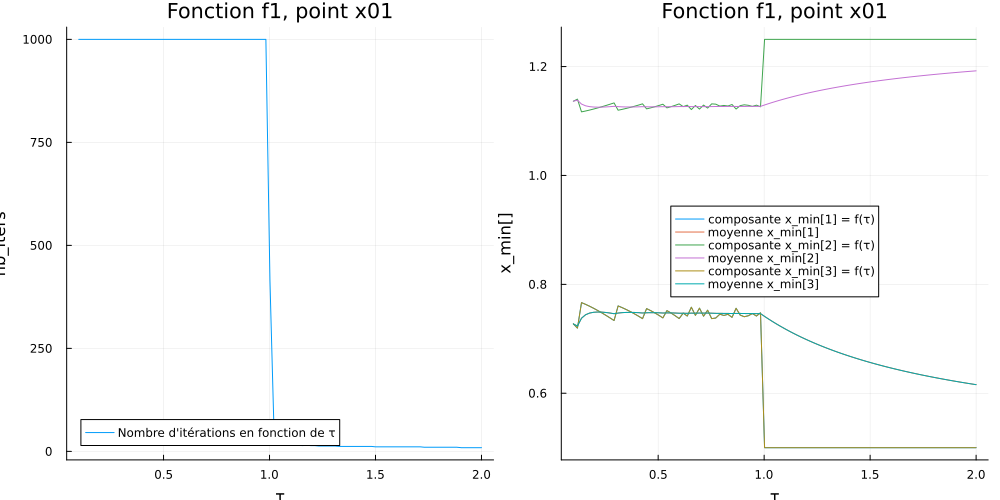

In [7]:
using Plots
# initialisation des paramètres
lambda0 = 2
mu0 = 10
#tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4
	
# Les trois algorithmes d'optimisations sans contraintes utlisés
algo = "newton"

iters = []
thos = []
x_mins1 = []
x_mins2 = []
x_mins3 = []

for tho in range(0.1,2,length=100)
    options = [epsilon, tol, max_iters, lambda0, mu0, tho]
    xmin, _, _, nbiters = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x01,options)
    iters = [iters ; nbiters]
    thos = [thos ; tho]
    x_mins1 = [x_mins1 ; xmin[1]]
    x_mins2 = [x_mins2 ; xmin[2]]
    x_mins3 = [x_mins3 ; xmin[3]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end
    
moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
moy_x_min3 = zeros(length(x_mins3))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
    moy_x_min3[i] = sum(x_mins3[1:i])/length(x_mins3[1:i])
end

p1 = plot(thos,iters, label="Nombre d'itérations en fonction de τ", xlabel="τ", ylabel="nb_iters", title="Fonction f1, point x01", legend=:bottomleft)
p2 = plot(thos,[x_mins1,moy_x_min1, x_mins2, moy_x_min2, x_mins3, moy_x_min3], label=["composante x_min[1] = f(τ)" "moyenne x_min[1]" "composante x_min[2] = f(τ)" "moyenne x_min[2]" "composante x_min[3] = f(τ)" "moyenne x_min[3]"], xlabel="τ", ylabel="x_min[]", title="Fonction f1, point x01", legend=:inside)
plot(p1,p2,layout=(1,2),size=(1000,500))  

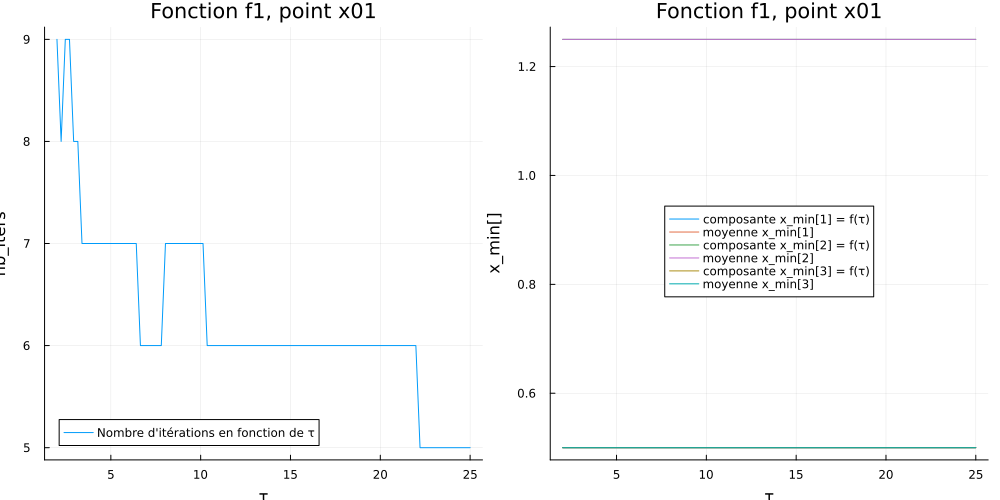

In [8]:
using Plots
# initialisation des paramètres
lambda0 = 2
mu0 = 10
#tho = 2
epsilon = 1.
tol = 1e-5
max_iters = 1000
options = [epsilon, tol, max_iters, lambda0, mu0, tho]
# La tolérance utilisée dans les tests
tol_erreur = 1e-4
	
# Les trois algorithmes d'optimisations sans contraintes utlisés
algo = "newton"

iters = []
thos = []
x_mins1 = []
x_mins2 = []
x_mins3 = []

for tho in range(2,25,length=100)
    options = [epsilon, tol, max_iters, lambda0, mu0, tho]
    xmin, _, _, nbiters = Lagrangien_Augmente(algo,fct1,contrainte1,grad_fct1,hess_fct1,grad_contrainte1,hess_contrainte1,pts2.x01,options)
    iters = [iters ; nbiters]
    thos = [thos ; tho]
    x_mins1 = [x_mins1 ; xmin[1]]
    x_mins2 = [x_mins2 ; xmin[2]]
    x_mins3 = [x_mins3 ; xmin[3]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end
    
moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
moy_x_min3 = zeros(length(x_mins3))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
    moy_x_min3[i] = sum(x_mins3[1:i])/length(x_mins3[1:i])
end

p1 = plot(thos,iters, label="Nombre d'itérations en fonction de τ", xlabel="τ", ylabel="nb_iters", title="Fonction f1, point x01", legend=:bottomleft)
p2 = plot(thos,[x_mins1,moy_x_min1, x_mins2, moy_x_min2, x_mins3, moy_x_min3], label=["composante x_min[1] = f(τ)" "moyenne x_min[1]" "composante x_min[2] = f(τ)" "moyenne x_min[2]" "composante x_min[3] = f(τ)" "moyenne x_min[3]"], xlabel="τ", ylabel="x_min[]", title="Fonction f1, point x01", legend=:inside)
plot(p1,p2,layout=(1,2),size=(1000,500))  

Les tracés obtenu nous permettent de conclure qu'effectivement l'algorithme est plus performant quand $\tau$ augmente. On remarque également que pour des valeurs de $\tau$ faibles (typiquement entre 0 et 1), l'algorithme est très peu précis, et ne converge pas vers la solution exacte.

## Réponse Q3

Que proposez-vous comme méthode pour la résolution des problèmes avec des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet) ce nouvel algorithme.

Pour résoudre un problème avec des contraintes à la fois d'égalité et d'inégalité, on peut exprimer les inégalités sous forme d'égalités et ainsi se ramener à un algorithme similaire au notre qui aura seulement des contraintes d'égalités en plus. 

Par exemple : $g_{j}(x) \leq 0 \Leftrightarrow ( g_{j}(x) + s_{j} = 0, s_{j} \geq 0 )$